In [36]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
data = [
    pd.read_csv(f"results/{path}", sep="\t", names=["fen", label], skiprows=800_000)[label]
    for label, path in [
        ("parallel pread / MADV_NORMAL / prefixes on SSD RAID 0", "parallel-pread_normal_hot-prefix2_integrity_nvme-none_hdd-mq-deadline.tsv"),

        ("pread / MADV_NORMAL / prefixes on SSD RAID 0", "pread_normal_hot-prefix2_integrity_nvme-none_hdd-mq-deadline.tsv"),
        ("pread / MADV_RANDOM / prefixes on SSD RAID 0", "pread_random_hot-prefix2_integrity_nvme-none_hdd-mq-deadline.tsv"),
        ("pread / MADV_RANDOM / incomplete prefixes on SSD RAID 1", "pread_random_hot-prefix_integrity_nvme-none_hdd-mq-deadline.tsv"),
        ("pread / MADV_RANDOM / no SSD", "pread_random_no-prefix_integrity_nvme-none_hdd-mq-deadline.tsv"),
        
        ("mmap / MADV_RANDOM / incomplete prefixes on SSD RAID 1", "mmap_random_hot-prefix_integrity_nvme-none_hdd-mq-deadline.tsv"),
        ("mmap / MADV_NORMAL / prefixes on SSD RAID 0", "mmap_normal_hot-prefix2_integrity_nvme-none_hdd-mq-deadline.tsv"),
    ]
]

<Axes: xlabel='Response time in milliseconds (including 30ms offset)', ylabel='Proportion faster than response time'>

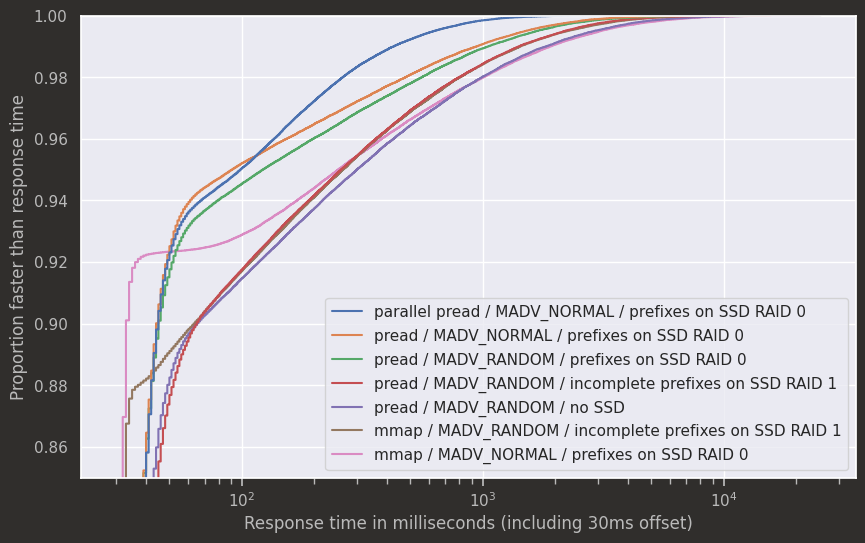

In [50]:
sns.set_theme(style="darkgrid", rc={
    "figure.figsize": (10, 6),
    "xtick.bottom": True,

    "figure.facecolor": "#302e2c",
    "axes.labelcolor": "#bababa",
    "xtick.color": "#bababa",
    "ytick.color": "#bababa",
})

ax = sns.ecdfplot([series + 30 for series in data], log_scale=True)
ax.set(ylim=(0.85, 1.0), xlabel="Response time in milliseconds (including 30ms offset)", ylabel="Proportion faster than response time")
sns.move_legend(ax, "lower right")
ax

<Axes: xlabel='Response time in milliseconds (no offset)', ylabel='Proportion faster than response time'>

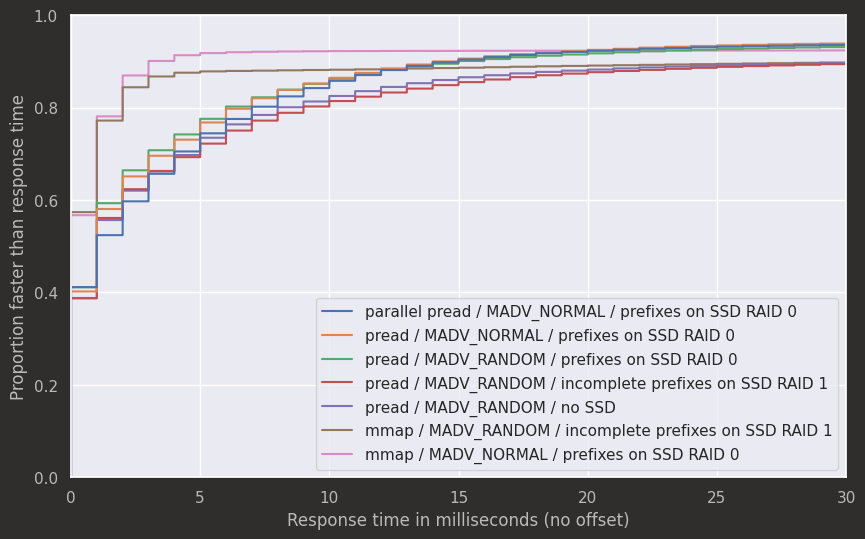

In [51]:
sns.set_theme(style="darkgrid", rc={
    "figure.figsize": (10, 6),

    "figure.facecolor": "#302e2c",
    "axes.labelcolor": "#bababa",
    "xtick.color": "#bababa",
    "ytick.color": "#bababa",
})

ax = sns.ecdfplot([series for series in data])
ax.set(xlim=(0, 30), xlabel="Response time in milliseconds (no offset)", ylabel="Proportion faster than response time")
sns.move_legend(ax, "lower right")
ax